# ARIMA를 사용하여 주가 예측하기

## 시계열
* 시간 순서대로 발생한 데이터의 수열(?) Series가 그런 의미인가
* 등간격일 필요는 없음
* 전제- 과거의 데이터에 패턴이 존재, 미래에도 그 패턴은 유지된다
* 전제를 만족하면 Stationary라고 함

## Stationary dataset
* Random walk의 경우
$X(t) = X(t-1) +Er(t)$로 표현할 수 있다. 이 경우, $Var(X)$
는 상수가 아니게 된다.
* 일반적으로, $X(t) = \rho X(t-1) +Er(t)$로 주어질 때, 양변의 기댓값을 구해보자.
$$
E(X(t)) = \rho E(X(t-1))
$$

$\rho$가 1에 가까울수록,$E(X)$가 0에서 멀어져 non stationary해진다.

step $p$까지의 Autocorrealation을 고려해 stationary 판정을 하는 Test를 Agumented DFT라고 하며, 통계량이 Critical Value보다 낮으면 시계열이 stationary하다고 판정한다.


[Dickey–Fuller test](https://en.wikipedia.org/wiki/Dickey%E2%80%93Fuller_test)

## Visualizing model

직관적으로는, 평균과 분산이 상수로 일정하다면 stationary이다. 이를 확인하기 위해서 rolling mean, rolling std를 시각화할 수 있다.

# TSLA prediction

In [58]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/TSLA.csv' 
df = pd.read_csv(dataset_filepath) 
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-08,49.009998,49.832001,48.810001,49.633999,49.633999,15691000
1,2015-09-09,50.410000,50.849998,49.660000,49.782001,49.782001,16954000
2,2015-09-10,49.445999,50.144001,49.066002,49.695999,49.695999,13545000
3,2015-09-11,49.528000,50.048000,48.945999,50.048000,50.048000,11754000
4,2015-09-14,50.220001,50.849998,49.933998,50.638000,50.638000,14454500


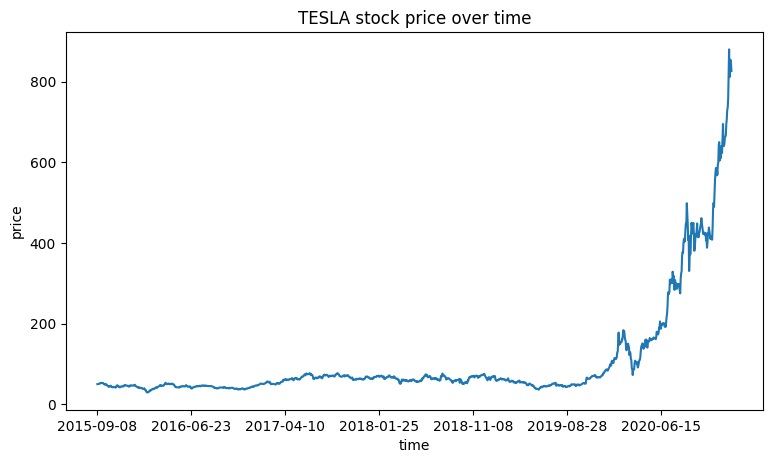

In [100]:
plt.figure(figsize=(9,5), dpi=100)
plt.plot(df["Date"][:1350], df["Close"][:1350])
plt.xticks(np.arange(0,1350, 200), df['Date'][:1350:200])
plt.title("TESLA stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [118]:
price = df['Close'][1000:1350]
type(price)

pandas.core.series.Series

In [119]:
train_data, test_data = price[0:int(len(price)*0.9)], price[int(len(price)*0.9):]

In [120]:
# Build Model
model = ARIMA(train_data, order=(4, 1, 0))  
fitted_m = model.fit(disp=0)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  314
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -1243.845
Method:                       css-mle   S.D. of innovations             12.709
Date:                Tue, 07 Sep 2021   AIC                           2499.690
Time:                        01:53:42   BIC                           2522.187
Sample:                             1   HQIC                          2508.680
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.6560      0.821      2.018      0.044       0.048       3.264
ar.L1.D.Close    -0.0086      0.057     -0.151      0.880      -0.120       0.103
ar.L2.D.Close     0.0396      0.057     

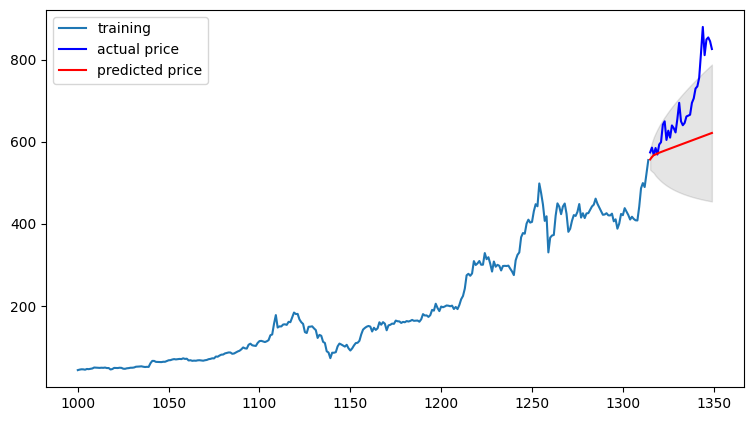

In [122]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [123]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(test_data, fc)
print('MSE: ', mse)

mae = mean_absolute_error(test_data, fc)
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(test_data,fc))
print('RMSE: ', rmse)

mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  13760.331308519024
MAE:  89.69239478939532
RMSE:  117.30443857126218
MAPE: 12.00%


# ALTA prediction

In [124]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/ALTA.csv' 
df = pd.read_csv(dataset_filepath) 
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-06-11,15.760000,17.440001,15.610000,16.700001,15.072537,1408700
1,2015-06-12,16.490000,16.780001,16.000000,16.410000,14.810794,186200
2,2015-06-15,16.110001,16.600000,16.000000,16.059999,14.494903,70500
3,2015-06-16,16.070000,16.250000,16.049999,16.200001,14.621264,41700
4,2015-06-17,16.200001,16.690001,16.110001,16.490000,14.882999,43900


In [125]:
df.shape

(1571, 7)

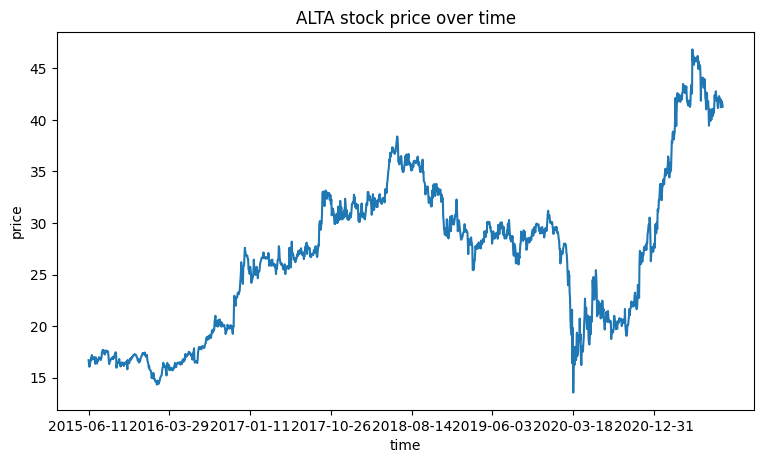

In [126]:
plt.figure(figsize=(9,5), dpi=100)
plt.plot(df["Date"], df["Close"])
plt.xticks(np.arange(0,1571, 200), df['Date'][:1571:200])
plt.title("ALTA stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [150]:
price = df['Close'][:1100]
type(price)

pandas.core.series.Series

In [151]:
train_data, test_data = price[0:int(len(price)*0.9)], price[int(len(price)*0.9):]

In [152]:
# Build Model
model = ARIMA(train_data, order=(5, 1, 0))  
fitted_m = model.fit(disp=0)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  989
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -580.629
Method:                       css-mle   S.D. of innovations              0.435
Date:                Tue, 07 Sep 2021   AIC                           1175.257
Time:                        02:28:10   BIC                           1209.534
Sample:                             1   HQIC                          1188.292
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0135      0.011      1.251      0.211      -0.008       0.035
ar.L1.D.Close    -0.1023      0.032     -3.219      0.001      -0.165      -0.040
ar.L2.D.Close    -0.0460      0.032     

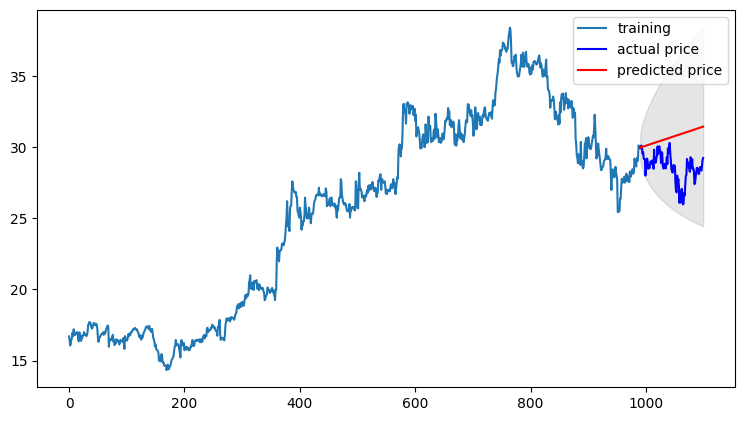

In [153]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [154]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(test_data, fc)
print('MSE: ', mse)

mae = mean_absolute_error(test_data, fc)
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(test_data,fc))
print('RMSE: ', rmse)

mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  6.00225255157931
MAE:  2.1243636753141155
RMSE:  2.449949499801845
MAPE: 7.58%


# EQR Prediction

In [155]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/EQR.csv' 
df = pd.read_csv(dataset_filepath) 
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-08-12,14.5000,14.5000,13.6875,14.3125,3.174564,13086600
1,1993-08-13,14.2500,14.2500,13.8750,13.8750,3.077524,1277800
2,1993-08-16,13.8750,14.0000,13.8125,14.0000,3.105249,559000
3,1993-08-17,14.0000,14.1250,13.9375,14.0625,3.119113,545600
4,1993-08-18,14.0625,14.0625,14.0625,14.0625,3.119113,469200


In [156]:
df.shape

(7068, 7)

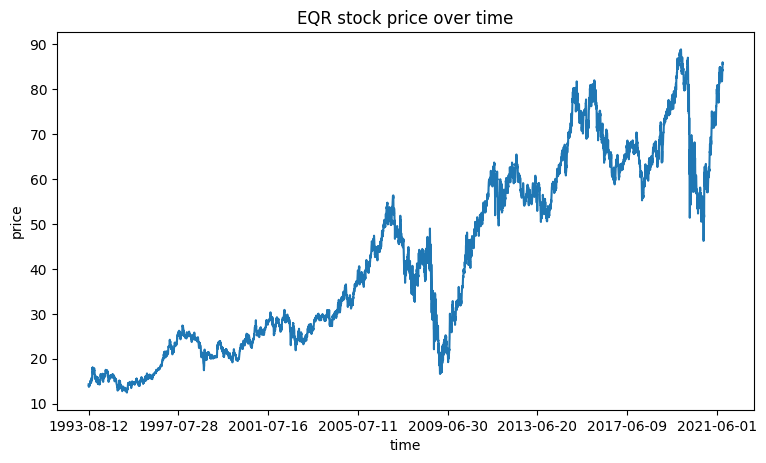

In [160]:
plt.figure(figsize=(9,5), dpi=100)
plt.plot(df["Date"], df["Close"])
plt.xticks(np.arange(0,7068, 1000), df['Date'][:7068:1000])
plt.title("EQR stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [161]:
price = df['Close']
type(price)

pandas.core.series.Series

In [162]:
train_data, test_data = price[0:int(len(price)*0.9)], price[int(len(price)*0.9):]

In [163]:
# Build Model
model = ARIMA(train_data, order=(5, 1, 0))  
fitted_m = model.fit(disp=0)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 6360
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6724.524
Method:                       css-mle   S.D. of innovations              0.697
Date:                Tue, 07 Sep 2021   AIC                          13463.047
Time:                        02:44:36   BIC                          13510.352
Sample:                             1   HQIC                         13479.427
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0084      0.007      1.213      0.225      -0.005       0.022
ar.L1.D.Close    -0.1266      0.013    -10.102      0.000      -0.151      -0.102
ar.L2.D.Close    -0.0334      0.013     

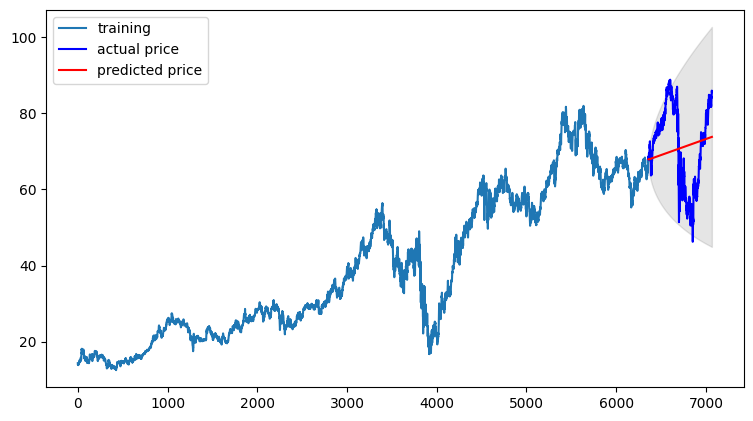

In [164]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [165]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(test_data, fc)
print('MSE: ', mse)

mae = mean_absolute_error(test_data, fc)
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(test_data,fc))
print('RMSE: ', rmse)

mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  125.19886356617324
MAE:  9.737899759446211
RMSE:  11.18922980218805
MAPE: 14.35%


# 회고

In [ ]:
1️⃣ 잘한 점:


2️⃣ 어려웠던 점:

ARIMA의 기본적인 흐름을 잘 이해하지 못해 충분히 활용하지 못했다
    
3️⃣ 느낀 점:

통계학 분야의 수식은 늘 감이 잘 안 잡힌다
ARIMA 모델로 주식 가격을 예측하는 성능은 성공적이라고 하기 힘든 것 같다